<H1>Dataset Loading and Interaction Extraction</h1>

In [1]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.proteins = []
        self.interactions = []
        self.reconstructedText = ""
        self.words = []
        self.valid = False

    def show(self):
        print(self.text)
        print(self.proteins)
        if len(self.interactions):
            for i in self.interactions:
                print(i)
        print()
        
        
    def processText(self):
        #self.text = self.text.replace("_/_","_ _")
        #self.text = self.text.replace("_:_","_ _")
        #self.text = self.text.replace("_-_","_ _")
        self.text = re.sub("(\_[^_]_)", "_ _", self.text)#regexp to remove things like _:_
        self.text = self.text.replace("(_","_")
        self.text = self.text.replace("_)","_")
    
    def checkValidity(self):
        count = 0
        for w in range(len(self.words)):
            if "__" in self.words[w]:
                count = count +1
        
        if count == len(self.proteins):
            self.valid = True
            #print(self.valid)
        
    
    def reconstructText(self):
        self.words = self.text.split(" ")
        self.checkValidity()
        #print(self.words)
        if self.valid:
            p=0
            for w in range(len(self.words)):
                if "__" in self.words[w]:
                    self.words[w] = self.proteins[p]
                    #self.words[w] = "PROTEIN"+str(p)
                    p=p+1
            #print(self.words)
            #print()
        
    def reassembleSentence(self):
        print(" ".join(self.words))
        
    def fullProcess(self):
        self.processText()
        self.reconstructText()
        

In [2]:
import pickle

with open('datasetTrain.pkl', 'rb') as input1:
    trainSetRaw = pickle.load(input1)
    
with open('datasetTest.pkl', 'rb') as input2:    
    testSetRaw = pickle.load(input2)
    
try:
    print(len(trainSetRaw))
    print(len(testSetRaw))
except NameError:
    print("nope")   

2245
529


In [3]:
def findMaxWords(inputList):
    maxwords = -1 
    for i in inputList:
        if len(i.words)>maxwords:
            maxwords = len(i.words)
    print(maxwords)
    

In [4]:
findMaxWords(trainSetRaw)
findMaxWords(testSetRaw)

93
74


<h1>Maximum Words In Sentence</h1>

We start out with
2245 training examples
529 test examples

mean 24.980894015861573
std 10.856406734698178
80 words: 2770
70 words: 2766
60 words: 2751
50 words: 2697
48 words: 2674
40 words: 2544
30 words: 2086

Selecting for under 48 words we are left with
2186 training examples
511 test examples


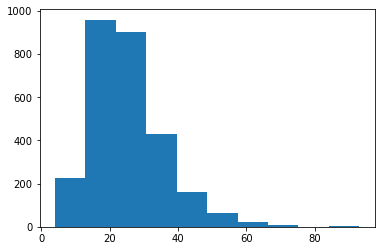

In [5]:
print("We start out with")

print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

print()

allSet = [len(x.words) for x in trainSetRaw+testSetRaw]

from matplotlib import pyplot as plt 
import numpy as np  

print("mean",np.mean(allSet))

print("std",np.std(allSet))

plt.hist(allSet)



selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=80 ]

print("80 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=70 ]

print("70 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=60 ]

print("60 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=50 ]

print("50 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=48 ]

print("48 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=40 ]

print("40 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=30 ]

print("30 words:",len(selectedSet))


#HERE
maxSentenceWords = 50

trainSetRaw = [x for x in trainSetRaw if len(x.words)<=maxSentenceWords]
testSetRaw = [x for x in testSetRaw if len(x.words)<=maxSentenceWords]


print()
print("Selecting for under 48 words we are left with")
print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

In [6]:
print(trainSetRaw[0])
print()

print(trainSetRaw[0].text)
print()

print(trainSetRaw[0].words)
print()

print(trainSetRaw[0].proteins)



print(len('protein0'))


Cytokines measurements during _________ treatment showed a trend to decreasing levels of ____ at 4, 12, and 24 weeks.

['Cytokines', 'measurements', 'during', 'PROTEIN0', 'treatment', 'showed', 'a', 'trend', 'to', 'decreasing', 'levels', 'of', 'PROTEIN1', 'at', '4,', '12,', 'and', '24', 'weeks.']

['PROTEIN0', 'PROTEIN1']
8


In [7]:
import string
string.ascii_letters

import random
random.choice(string.ascii_letters)

def genRandomWord():
    word = ''
    for letter in range(random.randint(3,9)):
        word+=random.choice(string.ascii_letters)
        
    return word
        

for i,v in enumerate(range(10)):
    print(i,genRandomWord())

0 tVgm
1 HIVrgY
2 EJxuMY
3 GbHey
4 uuxKCHpzc
5 iNQhQOZqR
6 FCDA
7 vphAzAH
8 sxD
9 bYgZy


In [8]:
import re

re.sub('PROTEIN[0-9]',genRandomWord(),'PROTEINA PROTEIN1 PROTEIN2 is a sentence')




'PROTEINA zHQhsnnD zHQhsnnD is a sentence'

In [9]:
with open ("protein_list.txt", "r", encoding="utf8") as myfile:
    lines=myfile.readlines()
    myfile.close()

proteins = [l.rstrip() for l in lines]    
print(len(proteins),"proteins imported")


import random

def genRandomProtein():
    return random.choice(proteins)
        

for i,v in enumerate(range(10)):
    print(i,genRandomProtein())

96355 proteins imported
0 pf03591:tigr00346:cog1296
1 gl23737
2 ern2
3 gl26263
4 gg17204
5 si:ch211-191j22.3
6 agap007815-pa
7 silverdb:cep02838
8 si:dkey-5i3.5
9 klla0f05335p


In [10]:
for i in range(10):
    print('PROTEIN'+str(i))

PROTEIN0
PROTEIN1
PROTEIN2
PROTEIN3
PROTEIN4
PROTEIN5
PROTEIN6
PROTEIN7
PROTEIN8
PROTEIN9


In [11]:
trainSet = []
trainLabel = []

for example in trainSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        sentence = sentence.lower()
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            trainLabel = trainLabel + [1]
            #print("HIT")
        else:
            trainLabel = trainLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0].lower(),'PROTEINA')
        sentence = sentence.replace(interaction[1].lower(),'PROTEINB')
        for i in range(10):
            sentence = sentence.replace(('PROTEIN'+str(i)).lower(),genRandomProtein())
        #sentence = re.sub('PROTEIN[0-9]',genRandomWord(),sentence)
        
        #print(sentence)
        #print()
        #print()
        
        trainSet = trainSet + [sentence]    
            
    #print()
    
    
print(len(trainSet))
print(len(trainLabel))

10394
10394


In [12]:
testSet = []
testLabel = []

for example in testSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        sentence = sentence.lower()
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            testLabel = testLabel + [1]
            #print("HIT")
        else:
            testLabel = testLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0].lower(),'PROTEINA')
        sentence = sentence.replace(interaction[1].lower(),'PROTEINB')
        for i in range(10):
            sentence = sentence.replace(('PROTEIN'+str(i)).lower(),genRandomProtein())
        
        #print(sentence)
        #print()
        #print()
        
        testSet = testSet + [sentence]    
            
    #print()
    
    
print(len(testSet))
print(len(testLabel))

2336
2336


In [13]:
for t in trainSet:
    print(t)
    print()

cytokines measurements during PROTEINA treatment showed a trend to decreasing levels of PROTEINB at 4, 12, and 24 weeks.

levels of PROTEINA were slightly increased following PROTEINB treatment (p = 0.09).

this study describes the distributions of PROTEINA as well as mrnas for PROTEINB klla0c02189p collagen types ii pc22g26380 and iii klth0e07524p in a growing "cartilage cap" of osteochondroma.

this study describes the distributions of PROTEINA as well as mrnas for deha2f04928p PROTEINB collagen types ii j20 and iii aspartokinase in a growing "cartilage cap" of osteochondroma.

this study describes the distributions of PROTEINA as well as mrnas for gh22309 mee66 collagen types ii PROTEINB and iii gl12402 in a growing "cartilage cap" of osteochondroma.

this study describes the distributions of PROTEINA as well as mrnas for d-aminopeptidase klth0c07106p collagen types ii syntaxin-72 and iii PROTEINB in a growing "cartilage cap" of osteochondroma.

this study describes the distribution


thus, PROTEINA may serve as a link between PROTEINB and aael009852-pb coupling the b-cell antigen receptor to the phosphatidylinositol pathway.

thus, PROTEINA may serve as a link between slyb and PROTEINB coupling the b-cell antigen receptor to the phosphatidylinositol pathway.

thus, gh13384 may serve as a link between PROTEINA and PROTEINB coupling the b-cell antigen receptor to the phosphatidylinositol pathway.

the PROTEINA protein shares no significant homology with PROTEINB or other peripherin family proteins, which can form homo- and heterodimers.

the PROTEINA protein shares no significant homology with pc13g02700 or other PROTEINB family proteins, which can form homo- and heterodimers.

the app1 protein shares no significant homology with PROTEINA or other PROTEINB family proteins, which can form homo- and heterodimers.

in gene transfer experiments using a human lymphoid cell line, jurkat, coexpression of PROTEINA and PROTEINB provided markedly increased protection from cel

in addition, we show that in extracts depleted of PROTEINA and PROTEINB factors, transcription from the u1 promoter is restored by recombinant klla0b00264p but not by gl25519 or agap008867-pa indicating that transcription of class ii snrna genes requires a transposon complex different from the one used for mrna-encoding genes.

in addition, we show that in extracts depleted of PROTEINA and gl16831 factors, transcription from the u1 promoter is restored by recombinant PROTEINB but not by gh14680 or gh23963 indicating that transcription of class ii snrna genes requires a deha2b09614p complex different from the one used for mrna-encoding genes.

in addition, we show that in extracts depleted of PROTEINA and k10017 factors, transcription from the u1 promoter is restored by recombinant spui but not by PROTEINB or pc22g16200 indicating that transcription of class ii snrna genes requires a neuroguidin complex different from the one used for mrna-encoding genes.

in addition, we show that in e


the region of PROTEINA most important for binding to the PROTEINB is composed of residues from the amino terminus of the d-helix, carboxyl terminus of the b-helix, and c-d loop.

the two residues of PROTEINA that contribute the majority of free energy for PROTEINB binding, phe-156 and lys-159 are surrounded by other residues which have only a moderate impact.

a second region of PROTEINA that includes residues from the carboxyl terminus of the d-helix and a-b loop also had a weak influence on PROTEINB binding.

residues in PROTEINA from both the a- and c-helices are involved in binding the PROTEINB co-receptor.

abolition of the PROTEINA binding site in PROTEINB created antagonists of deha2f23430p action.

abolition of the PROTEINA binding site in gl16917 created antagonists of PROTEINB action.

abolition of the gh14068 binding site in PROTEINA created antagonists of PROTEINB action.

the PROTEINA glucose transporter interacts with PROTEINB and gl23224

the PROTEINA glucose transporte

moreover, mutation of ncu10036 residues 143-145 impairs binding of 14-3-3, but not PROTEINA to the PROTEINB

thus, 14-3-3 interaction with the PROTEINA may serve in negative regulation of PROTEINB function by facilitating dissociation of 14-3-3 from the nh2 terminus of nfd1 to promote subsequent events necessary for full activation of aael015182-pa

thus, 14-3-3 interaction with the PROTEINA may serve in negative regulation of sharpin-like function by facilitating dissociation of 14-3-3 from the nh2 terminus of PROTEINB to promote subsequent events necessary for full activation of pmi15

thus, 14-3-3 interaction with the PROTEINA may serve in negative regulation of aael013767-pa function by facilitating dissociation of 14-3-3 from the nh2 terminus of pgpb to promote subsequent events necessary for full activation of PROTEINB

thus, 14-3-3 interaction with the gl15549 may serve in negative regulation of PROTEINA function by facilitating dissociation of 14-3-3 from the nh2 terminus of PR

biochemical analyses revealed a strong induction of seeligeriolysin PROTEINA nirf tyrosine-autophosphorylation by PROTEINB which was maximal after 5 minutes and was followed by receptor downregulation.

biochemical analyses revealed a strong induction of klla0f04477p thiamine-4 PROTEINA tyrosine-autophosphorylation by PROTEINB which was maximal after 5 minutes and was followed by receptor downregulation.

biochemical complementation experiments also indicate that the PROTEINA and PROTEINB proteins interact.

four yeast spliceosomal proteins PROTEINA PROTEINB aael002530-pa and deha2f17930p interact to promote aael008954-pa binding to pre-mrna.

four yeast spliceosomal proteins PROTEINA gl23646 PROTEINB and aael001906-pa interact to promote acl022wp binding to pre-mrna.

four yeast spliceosomal proteins PROTEINA gh17923 pc20g04100 and PROTEINB interact to promote mos1 binding to pre-mrna.

four yeast spliceosomal proteins PROTEINA klla0b06369p atpap1,atpap12,pap1,pap12 and aminoacylase-1

by using a chromatin immunoprecipitation (chip) assay, we observed that chr4,pkr1 PROTEINA and not deha2c08404p gh20640 was acetylated from the endogenous rns2 deha2f03652p promoter in vivo, implying that otolin-1 pc21g06290 and not the aspartoacylase complex, was critical in complexing with PROTEINB in up-regulation of chr4,pkr1 PROTEINA in htlv-1-infected cells.

by using a chromatin immunoprecipitation (chip) assay, we observed that PROTEINB PROTEINA and not aael012315-pa eif4a was acetylated from the endogenous nattectin spechinoidin promoter in vivo, implying that gg10914 pc13g04720 and not the m-factor complex, was critical in complexing with cat2 in up-regulation of PROTEINB PROTEINA in htlv-1-infected cells.

by using a chromatin immunoprecipitation (chip) assay, we observed that si:ch211-261n11.7 PROTEINA and not gl11674 lvhb9 was acetylated from the endogenous aael009861-pa cyp76c1 promoter in vivo, implying that gh10455 rt03046p and not the agap008634-pa complex, was critica


this suggests that dephosphorylation of PROTEINA and zgc:171929 zmp:0000001267 by PROTEINB could be implicated in the disruption of lafd stress fibers and in the reorganization of microfilaments induced by this hormone.

this suggests that dephosphorylation of PROTEINA and semaphorin-7a-like gg17006 by agap005959-pa could be implicated in the disruption of PROTEINB stress fibers and in the reorganization of microfilaments induced by this hormone.

this suggests that dephosphorylation of gh23326 and PROTEINA PROTEINB by mrna-methyltransferase could be implicated in the disruption of atrbl4,rbl4 stress fibers and in the reorganization of microfilaments induced by this hormone.

this suggests that dephosphorylation of amsh2 and PROTEINA cyclin-b2-2 by PROTEINB could be implicated in the disruption of si:ch211-161n3.5 stress fibers and in the reorganization of microfilaments induced by this hormone.

this suggests that dephosphorylation of atgatl1,gatl1,glz1,parvus and PROTEINA silverdb:c


molecules known to link aael005806-pa filaments to membrane were also examined, including afr394wp mucin-5b PROTEINA and PROTEINB but none was identified at the host-parasite junction.

other PROTEINA proteins, including PROTEINB cullin-1-like and apum21,pum21 are not present.

other PROTEINA proteins, including agap008896-pa PROTEINB and pc21g11390 are not present.

other PROTEINA proteins, including aer401wp glucan-alpha-1,4-glucosidase and PROTEINB are not present.

other gp28 proteins, including PROTEINA PROTEINB and lin1084 are not present.

other klth0b09592p proteins, including PROTEINA gl18414 and PROTEINB are not present.

other aael008826-pa proteins, including gh19083 PROTEINA and PROTEINB are not present.

monoclonal antibodies recognizing the n- and c-terminal regions of PROTEINA disrupt PROTEINB stress fibers when microinjected into human fibroblasts.

these results show that the c-terminal PROTEINA site is distinct from the region recognized by the anti-functional antib

mutations in saccharomyces cerevisiae lin0938 klth0e15664p PROTEINA PROTEINB gl11267 gh10645 mtrh gh11219 and rnf5 increased the rate of genome rearrangements up to 200-fold whereas mutations in agl187wp lin0938 klth0e15664p PROTEINA and PROTEINB had little effect.

mutations that alter putative rna-binding residues of either PROTEINA rrm are lethal in vivo, but do not prevent binding to PROTEINB in vitro, suggesting that the predicted rna-binding surfaces of gg17306 are not required for interaction with pc22g19410

mutations that alter putative rna-binding residues of either PROTEINA rrm are lethal in vivo, but do not prevent binding to pc06g00120 in vitro, suggesting that the predicted rna-binding surfaces of PROTEINB are not required for interaction with mucin-6

mutations that alter putative rna-binding residues of either PROTEINA rrm are lethal in vivo, but do not prevent binding to agap008522-pa in vitro, suggesting that the predicted rna-binding surfaces of pc20g10260 are not re

the effects of two adhesion substrates (serum and PROTEINA and time in culture on the expression of genes encoding deha2g16522p PROTEINB isoforms and atscar-like,scarl,wave5 were analysed in myocytes isolated from adult rat heart and maintained in serum-free culture.

the effects of two adhesion substrates (serum and PROTEINA and time in culture on the expression of genes encoding pc16g15520 ccmfc isoforms and PROTEINB were analysed in myocytes isolated from adult rat heart and maintained in serum-free culture.

the effects of two adhesion substrates (serum and deha2a08118p and time in culture on the expression of genes encoding PROTEINA PROTEINB isoforms and stu1 were analysed in myocytes isolated from adult rat heart and maintained in serum-free culture.

the effects of two adhesion substrates (serum and aael002898-pa and time in culture on the expression of genes encoding PROTEINA kdka isoforms and PROTEINB were analysed in myocytes isolated from adult rat heart and maintained in se


PROTEINA also inhibited muscle differentiation as measured by several parameters, including cell fusion and the expression of other muscle-specific genes, such as ketosamine-3-kinase-like and PROTEINB

cog0079 also inhibited muscle differentiation as measured by several parameters, including cell fusion and the expression of other muscle-specific genes, such as PROTEINA and PROTEINB

to characterize the phenotypic alteration in mesangial cells in human glomerulonephritis, we investigated the expression of PROTEINA PROTEINB and gh22087 deha2e21076p in pilh nephropathy.

to characterize the phenotypic alteration in mesangial cells in human glomerulonephritis, we investigated the expression of PROTEINA cib1 and PROTEINB pc20g00660 in zgc:110239 nephropathy.

to characterize the phenotypic alteration in mesangial cells in human glomerulonephritis, we investigated the expression of PROTEINA vpreb2 and nonaspanin PROTEINB in hyccin-like nephropathy.

to characterize the phenotypic alteratio


we have cloned a saccharomyces cerevisiae gene fig00452900 encoding a low-m(r) PROTEINA of 143 amino acid (aa) residues (yeast PROTEINB pc16g00320 its aa sequence is 35% identical to porcine ddf1

we have cloned a saccharomyces cerevisiae gene pggl encoding a low-m(r) PROTEINA of 143 amino acid (aa) residues (yeast klth0d16434p PROTEINB its aa sequence is 35% identical to porcine amidinotransferase

we have cloned a saccharomyces cerevisiae gene klth0c03608p encoding a low-m(r) PROTEINA of 143 amino acid (aa) residues (yeast yrbb far1 its aa sequence is 35% identical to porcine PROTEINB

we have cloned a saccharomyces cerevisiae gene cadherin-23-like encoding a low-m(r) topp6 of 143 amino acid (aa) residues (yeast PROTEINA PROTEINB its aa sequence is 35% identical to porcine klla0d06259p

we have cloned a saccharomyces cerevisiae gene lmo2083 encoding a low-m(r) fi19917p1 of 143 amino acid (aa) residues (yeast PROTEINA yeib its aa sequence is 35% identical to porcine PROTEINB

we have

experimental studies provided evidences that PROTEINA cholecystokinin (cck), galanin (gal), PROTEINB (npy) and insulin are involved in feeding behaviour

plasma concentrations of fsh, PROTEINA cck, gal, PROTEINB and insulin were determined using commercial ria kits

our results, ie higher mean plasma PROTEINA levels in postmenopausal diabetic women and positive correlation of cck with PROTEINB and insulin, may suggest the role of these neuropeptides in metabolic disorders leading to type 2 diabetes mellitus

these results suggest that t3 may increase PROTEINA family expression independent of PROTEINB action

the arc PROTEINA neurones are stimulated by starvation, probably mediated by falls in circulating PROTEINB and insulin (which both inhibit these neurones), and contribute to the increased hunger in this and other conditions of energy deficit

arc PROTEINA neurones also mediate hyperphagia and obesity in the ob/ob and db/db mice and fa/fa rat, in which PROTEINB inhibition is lost th

In [14]:
print(len(trainSet))
print(len(testSet))

uniqueTrain = set()
uniqueTest = set()


uniqueTrain.update(trainSet)
uniqueTest.update(testSet)


print(len(uniqueTrain),len(uniqueTest))

10394
2336
10393 2336


<H1>Imports</h1>

In [15]:
import os
import re
import gc
import time
import numpy as np
import tensorflow as tf
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend


from keras import regularizers

from keras.models import Sequential, Model

from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Reshape
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Lambda
from keras.layers.merge import concatenate


from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from keras.optimizers import SGD, Adam, RMSprop


#import gensim.models.keyedvectors as word2vec



print("Imports work")

C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-

Imports work


Using TensorFlow backend.


<h1>Embedding</h1>

In [16]:
import pickle


 
'''
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
'''

if os.path.isfile('tokenizer.pickle'):
    # loading
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle) 
    print("Loaded tokenizer")
else:   

    max_features = 20000
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(trainSet)
    
    with open('tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
list_tokenized_train = tokenizer.texts_to_sequences(trainSet)
list_tokenized_test = tokenizer.texts_to_sequences(testSet)

maxlen = maxSentenceWords
padded_training_docs = pad_sequences(list_tokenized_train, maxlen=maxlen)
padded_test_docs = pad_sequences(list_tokenized_test, maxlen=maxlen)

print(type(padded_training_docs))

print(padded_training_docs.shape)


print(type(padded_test_docs))

print(padded_test_docs.shape)


Loaded tokenizer
<class 'numpy.ndarray'>
(10394, 50)
<class 'numpy.ndarray'>
(2336, 50)


In [17]:



def loadEmbeddingMatrix(typeToLoad):
        #load different embedding file from Kaggle depending on which embedding 
        #matrix we are going to experiment with
        if(typeToLoad=="glove"):
            #EMBEDDING_FILE='../input/glove-twitter/glove.twitter.27B.25d.txt'
            EMBEDDING_FILE='glove.6B.300d.txt'
            #EMBEDDING_FILE='glove.840B.300d.txt'
            embed_size = 300#must be same as above
        elif(typeToLoad=="word2vec"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
            embed_size = 300
        elif(typeToLoad=="word2vecMed"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format("wikipedia-pubmed-and-PMC-w2v.bin", binary=True)
            embed_size = 200            
        elif(typeToLoad=="fasttext"):
            EMBEDDING_FILE='wiki-news-300d-1M.vec'
            embed_size = 300

        if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
            embeddings_index = dict()
            #Transfer the embedding weights into a dictionary by iterating through every line of the file.
            f = open(EMBEDDING_FILE,encoding="utf8")
            for line in f:
                #split up line into an indexed array
                values = line.split()                 
                #first index is word
                word = values[0]
                #store the rest of the values in the array as a new array
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs #50 dimensions
            f.close()
            print('Loaded %s word vectors.' % len(embeddings_index))
        else:
            embeddings_index = dict()
            for word in word2vecDict.wv.vocab:
                embeddings_index[word] = word2vecDict.word_vec(word)
            print('Loaded %s word vectors.' % len(embeddings_index))
            
        gc.collect()
        #We get the mean and standard deviation of the embedding weights so that we could maintain the 
        #same statistics for the rest of our own random generated weights. 
        
        
        '''
        counter = 0 
        for key,value in embeddings_index.items():
            
            #print(type(value))
            #print(value.shape)
            #print(value.shape[0])
            
            if value.shape!=(300,):
                print(value.shape)
                print()
        '''
        #Line to exclude wordvectors that aren't the right size
        embeddings_index = {key:value for key,value in embeddings_index.items() if value.shape==(embed_size,)}
        
        all_embs = np.stack(list(embeddings_index.values()))
        emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
        nb_words = len(tokenizer.word_index)
        #We are going to set the embedding size to the pretrained dimension as we are replicating it.
        #the size will be Number of Words in Vocab X Embedding Size
        embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
        gc.collect()

        #With the newly created embedding matrix, we'll fill it up with the words that we have in both 
        #our own dictionary and loaded pretrained embedding. 
        embeddedCount = 0
        for word, i in tokenizer.word_index.items():
            i-=1
            #then we see if this word is in glove's dictionary, if yes, get the corresponding weights
            embedding_vector = embeddings_index.get(word)
            #and store inside the embedding matrix that we will train later on.
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
                embeddedCount+=1
        print('total embedded:',embeddedCount,'common words')
        
        del(embeddings_index)
        gc.collect()
        
        #finally, return the embedding matrix
        return embedding_matrix

     
print()
print('word2vec')
#embedding_matrix_word2vec = loadEmbeddingMatrix('word2vec')


print()
print('word2vecMed')
#embedding_matrix_word2vec = loadEmbeddingMatrix('word2vecMed')

print()
print('glove')    
#embedding_matrix_glove = loadEmbeddingMatrix('glove')

print()
print('fasttext')
#embedding_matrix_fasttext = loadEmbeddingMatrix('fasttext')


#del embedding_matrix_word2vec

#del embedding_matrix_glove

#del embedding_matrix_fasttext

#inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

#x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)




word2vec

word2vecMed

glove

fasttext


<h1>Functional API</h1>

In [18]:

zhangTrainable = []
zhang = []

all_epochs_to_run  = 100
opt = 'adam'
learningRate = 0.01


lossType = 'binary_crossentropy'#"sparse_categorical_crossentropy" #"categorical_crossentropy" #'binary_crossentropy'

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

<h4>glove</h4>

In [20]:
embedding_matrix = loadEmbeddingMatrix('glove')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

Loaded 400000 word vectors.
total embedded: 5917 common words


In [21]:
#https://keras.io/getting-started/functional-api-guide/

#sentence_length = 100
#wordvec_length = 100

#input_size = 50#sentence_length*wordvec_length

conv_num = 3

block_num = 6


def conv_block(x):
    for c in range(conv_num):
        x = Conv1D(filters = 3, 
                   kernel_size = 64, 
                   strides=1, 
                   padding='same', 
                   use_bias=False)(x)#0.05 is too much
        x = BatchNormalization()(x)
    return x

 
def res_conv(x):
    original = x
    
    for r in range(block_num):
        x = conv_block(x)
    
    #vector addition
    result = np.add(x, original)
    
    return x

def big_block(x):
    x = MaxPooling1D(pool_size=3,strides=2)(x)
    x = res_conv(x)
    return x





input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length, weights=[embedding_matrix],  trainable=True)(input_layer)

x = Conv1D(filters = 1, kernel_size = 64, strides=1, padding='same', use_bias=False)(x)

x = big_block(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs = input_layer, outputs = output_layer)

model2.summary()


#compile
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model2
model2.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model2
trainLoss, trainAccuracy = model2.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model2
testLoss, testAccuracy = model2.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


predictions = np.round(model2.predict(padded_test_docs))

f1 = f1_score(testLabel, predictions, average="macro")
precision = precision_score(testLabel, predictions, average="macro")
recall = recall_score(testLabel, predictions, average="macro")


zhangTrainable += [trainAccuracy,testAccuracy,f1,precision,recall]

#del model2

#backend.clear_session()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           10270800  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 1)             19200     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 1)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 24, 3)             192       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 3)             12        
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 24, 3)             576

10394/10394 [==============================] - 12s 1ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 91/100
10394/10394 [==============================] - 12s 1ms/step - loss: 0.0060 - accuracy: 0.9975
Epoch 92/100
10394/10394 [==============================] - 12s 1ms/step - loss: 0.0055 - accuracy: 0.9969
Epoch 93/100
10394/10394 [==============================] - 12s 1ms/step - loss: 0.0099 - accuracy: 0.9964
Epoch 94/100
10394/10394 [==============================] - 12s 1ms/step - loss: 0.0122 - accuracy: 0.9962
Epoch 95/100
10394/10394 [==============================] - 12s 1ms/step - loss: 0.0097 - accuracy: 0.9954
Epoch 96/100
10394/10394 [==============================] - 12s 1ms/step - loss: 0.0067 - accuracy: 0.9969
Epoch 97/100
10394/10394 [==============================] - 12s 1ms/step - loss: 0.0055 - accuracy: 0.9975
Epoch 98/100
10394/10394 [==============================] - 12s 1ms/step - loss: 0.0075 - accuracy: 0.9964
Epoch 99/100
10394/10394 [========================

In [22]:
#https://keras.io/getting-started/functional-api-guide/

#sentence_length = 100
#wordvec_length = 100

#input_size = 50#sentence_length*wordvec_length

conv_num = 3

block_num = 6


def conv_block(x):
    for c in range(conv_num):
        x = Conv1D(filters = 3, 
                   kernel_size = 64, 
                   strides=1, 
                   padding='same', 
                   use_bias=False)(x)#0.05 is too much
        x = BatchNormalization()(x)
    return x

 
def res_conv(x):
    original = x
    
    for r in range(block_num):
        x = conv_block(x)
    
    #vector addition
    result = np.add(x, original)
    
    return x

def big_block(x):
    x = MaxPooling1D(pool_size=3,strides=2)(x)
    x = res_conv(x)
    return x





input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length, weights=[embedding_matrix],  trainable=False)(input_layer)

x = Conv1D(filters = 1, kernel_size = 64, strides=1, padding='same', use_bias=False)(x)

x = big_block(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs = input_layer, outputs = output_layer)

model2.summary()


#compile
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()


start = time.time()

# fit the model2
model2.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1)

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model2
trainLoss, trainAccuracy = model2.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model2
testLoss, testAccuracy = model2.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


predictions = np.round(model2.predict(padded_test_docs))

f1 = f1_score(testLabel, predictions, average="macro")
precision = precision_score(testLabel, predictions, average="macro")
recall = recall_score(testLabel, predictions, average="macro")


zhang += [trainAccuracy,testAccuracy,f1,precision,recall]

#del model2

#backend.clear_session()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 50, 300)           10270800  
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 50, 1)             19200     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 1)             0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 24, 3)             192       
_________________________________________________________________
batch_normalization_19 (Batc (None, 24, 3)             12        
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 24, 3)             576 

10394/10394 [==============================] - 9s 898us/step - loss: 0.1033 - accuracy: 0.9633
Epoch 23/100
10394/10394 [==============================] - 9s 891us/step - loss: 0.0923 - accuracy: 0.9661
Epoch 24/100
10394/10394 [==============================] - 9s 903us/step - loss: 0.0865 - accuracy: 0.9703
Epoch 25/100
10394/10394 [==============================] - 9s 907us/step - loss: 0.0873 - accuracy: 0.9699
Epoch 26/100
10394/10394 [==============================] - 9s 903us/step - loss: 0.0844 - accuracy: 0.9693
Epoch 27/100
10394/10394 [==============================] - 9s 901us/step - loss: 0.0724 - accuracy: 0.9776
Epoch 28/100
10394/10394 [==============================] - 9s 903us/step - loss: 0.0765 - accuracy: 0.9735
Epoch 29/100
10394/10394 [==============================] - 9s 914us/step - loss: 0.0795 - accuracy: 0.9747
Epoch 30/100
10394/10394 [==============================] - 9s 906us/step - loss: 0.0749 - accuracy: 0.9752
Epoch 31/100
10394/10394 [===============

Epoch 98/100
10394/10394 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.99 - 9s 902us/step - loss: 0.0333 - accuracy: 0.9911
Epoch 99/100
10394/10394 [==============================] - 9s 896us/step - loss: 0.0310 - accuracy: 0.9927
Epoch 100/100
10394/10394 [==============================] - 9s 897us/step - loss: 0.0336 - accuracy: 0.9916

Training done in 15.711552842458088 minutes or 942.6931705474854 seconds now evaluating...

10394/10394 [==============================] - 2s 174us/step

2336/2336 [==============================] - 0s 138us/step


In [23]:
print("done")

done


In [24]:
from prettytable import PrettyTable

results = PrettyTable()



results.field_names = ["",
                       
                       "acc train",  "acc test","f1","precision","recall"]#,
                       #"Train 300 epochs", "Test 300 epochs",
                       #"Train 400 epochs", "Test 400 epochs"]

'''
denseResults = [x*100 for x in denseResults]

CNNResults = [x*100 for x in CNNResults]

LSTMResults = [x*100 for x in LSTMResults]
'''




results.add_row(["Zhang Trainable"] + zhangTrainable)
results.add_row(["Zhang"] + zhang)


#results.add_row(["Really Dense"] + reallyDenseResults)

print(results)

+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 |     acc train      |      acc test      |         f1         |     precision      |       recall       |
+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Zhang Trainable | 0.9976909756660461 | 0.6776540875434875 | 0.5509085826111266 | 0.5602643041207727 | 0.5494241963763881 |
|      Zhang      | 0.9949008822441101 | 0.607876718044281  | 0.5232907963213802 | 0.5234551521146098 | 0.5256565751022794 |
+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+


In [25]:
import joblib
#joblib.dump(model1, 'PPINetwork.pkl', compress=9)
print("exported")

exported
